
# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Wed, September 14</p>



# Question 1: Applications of machine learning (10 pts)

The article "Of Prediction and Policy", posted on Canvas under Modules --> Additional Resources, mentions several applications of machine learning. Pick any one of the works mentioned in this short article and:

1. (2 pts) Find at least one technical article that describes the work and provide the  citation(s). Very easy to do by Googling the names/institutions.
2. (4pts) In a few sentences describe the methodology/approach that was used.
3. (2 pts) Summarize in a couple of sentences what you liked about this work, and
4. (2 pts) Also summarize in a couple of sentences any concerns you may have about the work or its  application to societal problems.


## Answer



# Question 2: Maximum likelihood estimate (10 pts)

Consider the following univariate probability distribution 
$$p(x|a,b) = \frac{x^{a-1}}{\Gamma(a)b^a}exp(-\frac{x}{b}),$$ for $x \geq 0$ and $a,b > 0.  ~~ \Gamma(a)$ is a normalization term. 

You are given N i.i.d. data points drawn from this distribution. Derive the MLE estimate for $b$, in terms of $x_1, x_2, \ldots x_N$ and $a$.

## Answer

The log likelihood function is as follows:

\begin{eqnarray*}
l(a,b) &=& \sum_{i=1}^N \ln(p(x_i|a,b)) \\
& = & (a-1)\sum_{i=1}^N{\ln x_i} - N \ln \Gamma(a) - Na\ln b -  \frac{1}{b}\sum_{i=1}^Nx_i\\
\end{eqnarray*}

The first order conditions for a maximum are:

$$\frac{\delta}{\delta a}l(a,b) = 0$$

$$\frac{\delta}{\delta b}l(a,b) = 0$$

### MLE for b

\begin{eqnarray*}
\frac{\delta}{\delta b}l(a,b) &=& -\frac{Na}{b} + \frac{1}{b^2}\sum_{i=1}^Nx_i \\
& = & \frac{1}{b^2}(\sum_{i=1}^Nx_i - Nab)
\end{eqnarray*}

Solving for zero gives $b = \frac{\sum_{i=1}^Nx_i}{na} = \frac{\bar{x}}{a}$ as the maximum likelihood estimate.



# Question 3: Conditional Distributions (10 pts)

The joint pdf of two random  variables $X_1$ and $X_2$ is  constant (i.e., the joint distribution is uniform) within the area shown below, and zero outside of it. Given this joint distribution, obtain  the following two univariate distributions from it. It is not necessary to write the equations, if the distributions can be plotted / described in full detail.

a. (6 pts) The marginal distribution of $X_1$, $p_{X_1}(x_1)$

b. (4 pts) The conditional distribution $p_{X_2|X_1}(x_2 \,|\, x_1 = 0.5)$

<img src="hw1p3_questionpic.png">

## Answer

### a

For any value of $X_2 = x_2$, $X_1$ is uniformly distributed. So $p(x_1)$ is relative to the range of possible $X_2$ values at $X_1=x_1$.
<img src="hw1p3_solutionpic1.png">

From this we can deduce that $p(x_1)$ has a symmetric triangular shape.

Finally, the height of this triangle must be determined. Use the fact that the area under a probability density function must equal 1, and that a triangle's area is $\frac{1}{2}wh$.
<img src="hw1p3_solutionpic3.png">

### b
Given a specific value of $x_1$ the distribution of $X_2$ is uniform. In this case, $X_2$ is bounded between 0 and 1, so the distribution of $X_2$ is simply the uniform distribution between 0 and 1.
\begin{equation}
p_{X_2}(x_2) = \left\{ \begin{array}{lr} 1 & 0 \leq x_2 \leq 1 \\ 0 & \text{otherwise} \end{array} \right\}
\end{equation}
<img src="hw1p3_solutionpic4.png">

# Question 4: Bivariate Normal Distribution (20 pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 4; \sigma_y^2 = 16; \rho = 0$
2. $\sigma_x^2 = 4; \sigma_y^2 = 16; \rho = 0.5$

a. (8 pts) Obtain contour plots for each of the two distributions using  Python (http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html). 

b. (6 pts) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (6 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.

## Answer

### a

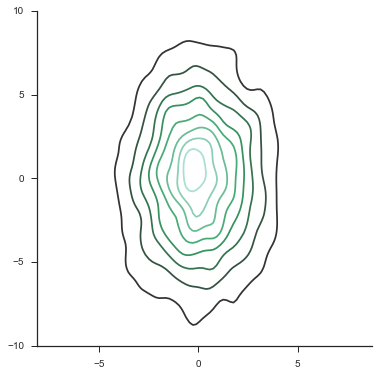

In [1]:
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Set2')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

def get_bivariate_normal(mean, cov, size):
    return np.random.multivariate_normal(mean, cov, size)


def plot_2d_contour(mean, cov, size=10000):
    bivariate_normal = get_bivariate_normal(mean, cov, size)
    plt.figure(figsize=(6.,6.)) # keep the axes the same size for better comparison
    sns.kdeplot(bivariate_normal[:, 0], bivariate_normal[:, 1], clip=((-10,10),(-10,10)))
    sns.despine()
    

def plot_3d_contour(mean, cov, view_angle, start_mesh=-10, end_mesh=10, delta=0.1):
    x, y = np.mgrid[start_mesh:end_mesh:delta, start_mesh:end_mesh:delta]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    probability = multivariate_normal.pdf(pos, mean, cov)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, view_angle)
    ax.plot_wireframe(x, y, probability, rstride=10, cstride=10)
    
    
def rotate_2d_contour(mean, cov, angle, size=20000):
    bivariate_normal = get_bivariate_normal(mean, cov, size)
    bivariate_normal = bivariate_normal.T # row-vector data, to fit Wikipedia's format for rotation matrices
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    rotated_normal = np.dot(rotation_matrix, bivariate_normal)
    plt.figure(figsize=(6.,6.))
    sns.kdeplot(rotated_normal[0, :], rotated_normal[1, :], clip=((-10,10),(-10,10)))
    sns.despine()
    new_mean = np.mean(rotated_normal, axis=1)
    return (new_mean, np.cov(rotated_normal))


mean_1 = mean_2 = [0, 0]
cov_1 = [[4, 0], [0, 16]]
cov_2 = [[4, 4], [4, 16]]

plot_2d_contour(mean_1, cov_1)

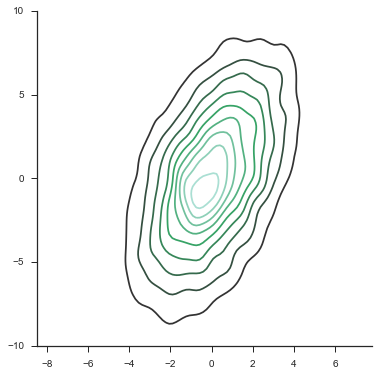

In [2]:
plot_2d_contour(mean_2, cov_2)

### b

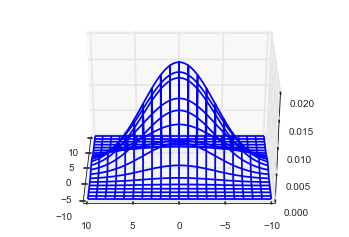

In [3]:
plot_3d_contour(mean_1, cov_1, 180)

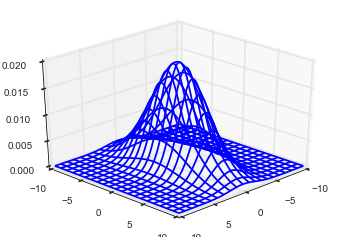

In [4]:
plot_3d_contour(mean_1, cov_1, 45)

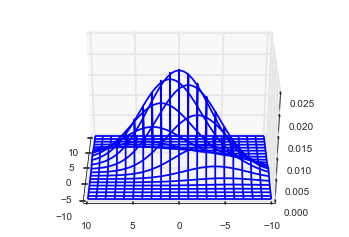

In [5]:
plot_3d_contour(mean_2, cov_2, 180)

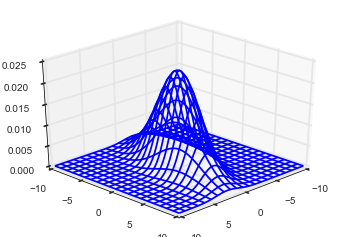

In [6]:
plot_3d_contour(mean_2, cov_2, 45)

### c

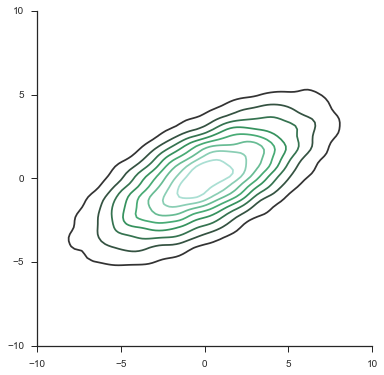

In [7]:
new_mean, new_covmatrix = rotate_2d_contour(mean_2, cov_2, angle = -np.pi/4.)

In [8]:
new_covmatrix

array([[ 13.95580053,   5.99027018],
       [  5.99027018,   6.03086211]])

# Question 5: MLR using scikit-learn (20 pts)

Consider the dataset (Advertising.csv), which has the following variables:

  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)


We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

1. (2 pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows. (Use shape and head commands in python)
2. (4 pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.
2. (2 pts) Fit a simple linear regression of SALES on TV. What is the regression coefficient for TV and what is its interpretation?
3. Split the data randomly into a training and test set (keep 1/3rd of the data for test).

  * (4 pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. 
  * (2 pts) Report the MSE obtained on train data. How much does this increase when you score your
model on test data?
  * (2 pts) Report the coefficients obtained by your model.
  * (4 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.


## Answer



In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [4]:
#read the data
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
# print the shape of the DataFrame
data.shape

(200, 4)

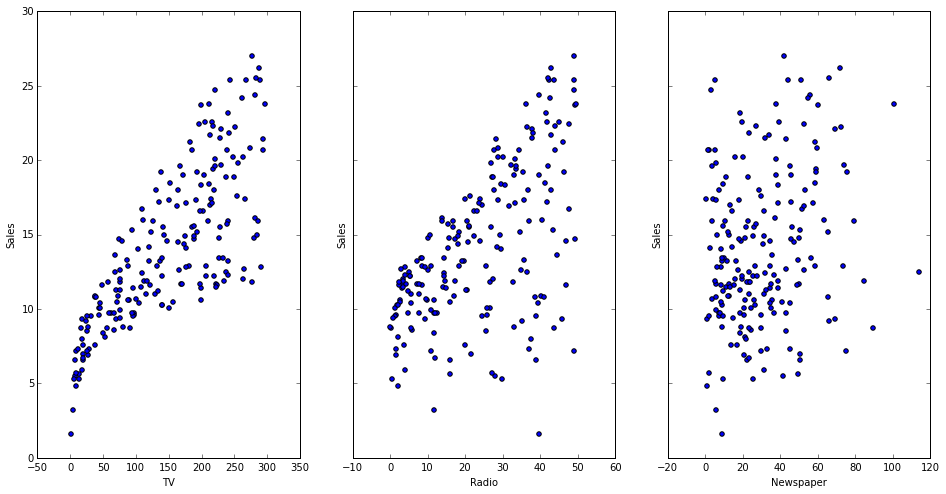

In [6]:
# visualize the relationship between the features and the response using scatterplots...and comment on the fit
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [7]:
#Fit a simple linear regression of SALES on TV. What is the coefficient on TV and what is its interpretation?
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
X = data.TV.reshape(-1,1)
y = data.Sales
clf.fit(X,y)
print(clf.intercept_)
print(clf.coef_)

#clf.fit(housing_data.LSTAT.reshape(-1, 1), housing_data.MEDV)
print ("Coeff value: {}").format(clf.coef_[0])
print ("""Means that all else constant, an increase in TV advertising by $1
            increases sales by {:0.3f} products""").format(clf.coef_[0])

7.03259354913
[ 0.04753664]
Coeff value: 0.047536640433
Means that all else constant, an increase in TV advertising by $1
            increases sales by 0.048 products


In [8]:
#fit an MLR to this dataset, with SALES as the dependent variable.
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
#from sklearn.linear_model import LinearRegression
clf.fit(X, y)

# print intercept and coefficients
print clf.intercept_
print clf.coef_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("On average, our prediction is off by a SALES amount of: {}".format(rmse))

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]
On average, our prediction is off by a SALES amount of: 1.93078438223


In [9]:
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 2.41085865456
Test MSE: 3.72792833068


In [10]:
# pair the feature names with the coefficients
zip(feature_cols, clf.coef_)

[('TV', 0.044665120632712822),
 ('Radio', 0.19663006282624826),
 ('Newspaper', 0.0060743865478868481)]

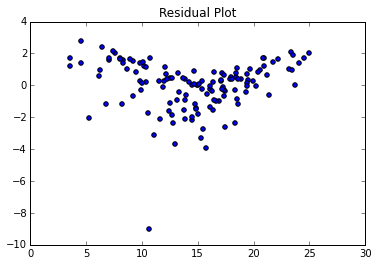

In [11]:
#residual plot
import matplotlib.pyplot as plt
residuals = y_train - train_predictions
plt.title("Residual Plot")
plt.scatter(train_predictions, residuals)
#sns.despine()

# Question 6: Illustrating the curse of dimensionality (10 pts)

For a hypersphere of radius $a$ in $d$ dimensions, the volume is related to the surface area of a unit hypersphere (S) as
    $$ V = \frac{S \times a^d}{d}.$$


1. (6 pts) Use this result to show that the fraction of the volume which lies at values of the radius between $a - \epsilon$ and $a$, where $0 < \epsilon < a$, is given by
$f = 1 - (1 - \epsilon/a)^d$. Hence, show that for any fixed $\epsilon$, no matter how small, this fraction tends to 1 as $d \rightarrow \infty$.
2. (4 pts) Evaluate the ratio $f$ numerically, with $\epsilon/a = 0.01$, for the cases $d$ = 2, 10, and 1000.


This problem shows that if data are randomly distributed within a very high-dimensional hypersphere, most of the mass is near the surface and there is very little of it near the "core". Thus, there are few "representative" points.

## Answer

1. The relationship between the volume $V$ of a $d$-dimensional hypersphere of radius $a$ and the surface area $S$ of the $d$-dimensional unit hypersphere is:
$$V_a = \frac{S \times a^d}{d} $$

Therefore, the fraction of volume between a sphere of radius $a$ and a sphere of radius $a-\epsilon$ is:
\begin{eqnarray*}
f & = & \frac{V_a - V_{a-\epsilon}}{V_a}\\
  & = & \frac{\frac{S\times a^{d}}{d} - \frac{S\times (a-\epsilon)^{d}}{d}}{\frac{S\times a^{d}}{d}} \\
  & = & 1-\frac{(a-\epsilon)^d}{a^d} \\
  & = & 1-\left(1-\frac{\epsilon}{a}\right)^d
\end{eqnarray*}
Since $0 < \epsilon < a$, $0 < \frac{\epsilon}{a} < 1$ and $0<\left(1-\frac{\epsilon}{a}\right)<1$. Therefore, as $d \rightarrow \infty$, $\left(1-\frac{\epsilon}{a}\right)^d \rightarrow 0$ and $f\rightarrow 1$.


2.   For $\epsilon/a = 0.01$:

| d     | f       |
| ------|:-------:|
| 2     | 0.01990 |
| 10    | 0.09560 |
| 1000  | 0.99996 |



